# Part 6: Image processing in Python

### 6.1 Pillow overview

In [ ]:
#@title ##### Download test images

%%capture
%%bash
git clone https://github.com/escape-velocity-labs/professional_python_developer_bootcamp.git
cp professional_python_developer_bootcamp/img/* .
rm -r professional_python_developer_bootcamp

### 6.2 Basic image manipulation

### 6.3 Color spaces and image modes

### 6.4 Brightness, contrast, saturation and sharpness adjustment

### 6.5 Manipulating pixels and regions

### 6.6 Drawing shapes and text on an image

### 6.7 Image composition

### 6.8 Color transformations

In [ ]:
sepia = [0.393, 0.769, 0.189, 0.349, 0.686, 0.168, 0.272, 0.534, 0.131]
cyanotype = [0.272, 0.534, 0.131, 0.349, 0.686, 0.168, 0.393, 0.769, 0.189]
swap_gb = [1, 0, 0, 0, 0, 1, 0, 1, 0]
swap_rb = [0, 0, 1, 0, 1, 0, 1, 0, 0]
swap_rg = [0, 1, 0, 1, 0, 0, 0, 0, 1]
twilight = [0.6, 0.4, 0, 0.2, 0.8, 0, 0.2, 0, 0.8]
rise = [1.438, -0.062, -0.062, -0.122, 1.378, -0.122, -0.016, -0.016, 1.483]
vintage = [0.8, 0.1, 0.1, 0.1, 0.8, 0.1, 0.1, 0.1, 0.8]

## Coding project: Photo editor


<br><br>

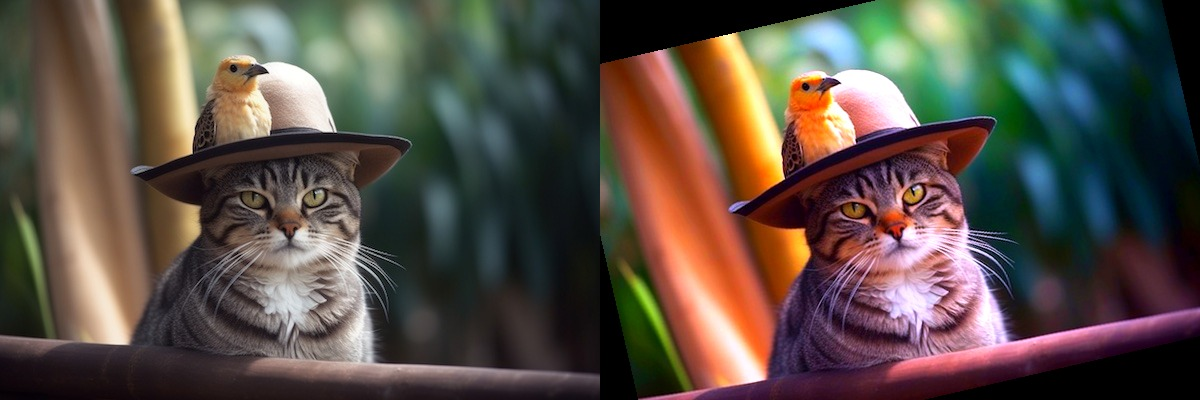


In [ ]:
#@title Upload an image in PNG or JPG format

from PIL import Image
from google.colab import files
import io

uploaded = files.upload()

for filename in uploaded:
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        file_bytes = io.BytesIO(uploaded[filename])
        original_img = Image.open(file_bytes)
        original_img.thumbnail((700, 700))
        print("Image uploaded successfully!")
        break
    else:
        print(f'Invalid file type for "{filename}". Please upload a PNG or JPG file.')

In [ ]:
#@title Photo editor { run: "auto", vertical-output: true}



In [ ]:
#@title Solution { run: "auto", vertical-output: true}

from PIL import Image, ImageEnhance


brightness = 0.8 #@param { type:"slider", min:0, max:2, step: 0.01 }
contrast = 1.13 #@param { type:"slider", min:0, max:2, step: 0.01 }
saturation = 1.35 #@param { type:"slider", min:0, max:2, step: 0.01 }
sharpness = 1.16 #@param { type:"slider", min:0, max:2, step: 0.01 }
rotation = 33 #@param { type: "slider", min: 0, max: 360, step: 1 }
filter = "Rise" #@param ["None", "Sepia", "Cyanotype", "Swap Green/Blue", "Swap Red/Blue", "Swap Red/Green", "Twilight", "Rise", "Vintage"]
flip = "Vertical" #@param ["None", "Horizontal", "Vertical"]
filter_dict = {"None": [1, 0, 0, 0, 1, 0, 0, 0, 1], "Sepia": [0.393, 0.769, 0.189, 0.349, 0.686, 0.168, 0.272, 0.534, 0.131], "Cyanotype": [0.272, 0.534, 0.131, 0.349, 0.686, 0.168, 0.393, 0.769, 0.189], "Swap Green/Blue": [1, 0, 0, 0, 0, 1, 0, 1, 0], "Swap Red/Blue": [0, 0, 1, 0, 1, 0, 1, 0, 0], "Swap Red/Green": [0, 1, 0, 1, 0, 0, 0, 0, 1], "Twilight": [0.6, 0.4, 0, 0.2, 0.8, 0, 0.2, 0, 0.8], "Rise": [1.438, -0.062, -0.062, -0.122, 1.378, -0.122, -0.016, -0.016, 1.483], "Vintage": [0.8, 0.1, 0.1, 0.1, 0.8, 0.1, 0.1, 0.1, 0.8]}


def apply_color_transformation(img, matrix):
    width, height = img.size
    new_img = img.copy()
    pixels = new_img.load()

    for py in range(height):
        for px in range(width):
            r, g, b = img.getpixel((px, py))

            # Apply color transformation
            tr = int(matrix[0] * r + matrix[1] * g + matrix[2] * b)
            tg = int(matrix[3] * r + matrix[4] * g + matrix[5] * b)
            tb = int(matrix[6] * r + matrix[7] * g + matrix[8] * b)

            # Make sure new values are within RGB bounds
            tr = min(255, max(0, tr))
            tg = min(255, max(0, tg))
            tb = min(255, max(0, tb))

            pixels[px, py] = (tr, tg, tb)

    return new_img


img = original_img.copy()

brightness_enhancer = ImageEnhance.Brightness(img)
img = brightness_enhancer.enhance(brightness)

contrast_enhancer = ImageEnhance.Contrast(img)
img = contrast_enhancer.enhance(contrast)

saturation_enhancer = ImageEnhance.Color(img)
img = saturation_enhancer.enhance(saturation)

sharpness_enhancer = ImageEnhance.Sharpness(img)
img = sharpness_enhancer.enhance(sharpness)


if flip == "Horizontal":
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
elif flip == "Vertical":
    img = img.transpose(Image.FLIP_TOP_BOTTOM)

img = img.rotate(rotation, resample=Image.BICUBIC)

filter_list = filter_dict[filter]
img = apply_color_transformation(img, filter_list)

img.show()

